In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [6]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

<AxesSubplot:>

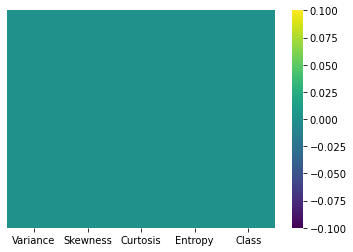

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [8]:
X=df.drop('Class',axis=1)
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [9]:
Y=df.iloc[:,4:]
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [15]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Linear

In [16]:
svclass=SVC(kernel='linear')

In [17]:
svclass.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
y_pred=svclass.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
con_mat=confusion_matrix(Y_test, y_pred)
con_mat

array([[226,   3],
       [  2, 181]], dtype=int64)

In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



# Poly

In [22]:
svclass=SVC(kernel='poly', degree=8)
svclass.fit(X_train, Y_train)
y_pred=svclass.predict(X_test)
con_mat=confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n', con_mat)
print('Classification report\n',
      classification_report(Y_test, y_pred))

Confusion matrix
 [[228   1]
 [ 96  87]]
Classification report
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       229
           1       0.99      0.48      0.64       183

    accuracy                           0.76       412
   macro avg       0.85      0.74      0.73       412
weighted avg       0.83      0.76      0.74       412



In [23]:
svclass=SVC(kernel='poly', degree=3)
svclass.fit(X_train, Y_train)
y_pred=svclass.predict(X_test)
con_mat=confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n', con_mat)
print('Classification report\n',
      classification_report(Y_test, y_pred))

Confusion matrix
 [[216  13]
 [  0 183]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       229
           1       0.93      1.00      0.97       183

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412

